## Example of usage of public code for KM models

This shows how to call executable `xs.exe` dowloaded from [GPD page](http://calculon.phy.hr/gpd/) from within python (so numbers produced by executable are captured and imported into python's numpy array).This is a jupyter python 2 notebook, but code itself should work in pure python as well.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from subprocess import Popen, PIPE

In [2]:
path_to_exec = '/home/kkumer/gepard/pype/xs.exe'

In [3]:
# Kinematics for a certain bin
xB = 0.264769; Q2 = 2.44750; t = -0.228628; Ebeam = 5.932

In [4]:
# Measurement by CLAS: [phi, BSA, error]
pve = np.array(
      [[  2.40000000e+01,   3.27550000e-02,   7.91669552e-02],
       [  5.30000000e+01,   1.20958000e-01,   5.41693360e-02],
       [  9.00000000e+01,   1.99482000e-01,   6.61508354e-02],
       [  1.26000000e+02,   1.65842000e-01,   9.00237473e-02],
       [  1.61000000e+02,   1.01187000e-01,   1.07194561e-01],
       [  1.99000000e+02,   2.77300000e-02,   9.01592789e-02],
       [  2.36000000e+02,  -1.64206000e-01,   8.36122253e-02],
       [  2.70000000e+02,  -2.24139000e-01,   7.04841540e-02],
       [  3.08000000e+02,  -1.46008000e-01,   5.42158064e-02],
       [  3.36000000e+02,   1.36500000e-03,   7.43535318e-02]])

In [5]:
# Function that will return same numbers as the stand-alone executable:
def xs(xB, Q2, t, phi, E=Ebeam, pol=1, model=7):
    """Run external code for KM models and return cross-sections."""
    args = [path_to_exec] + [str(k) for k in [model, -1, pol, E, 0, xB, Q2, t, phi]]
    proc = Popen(args, stdout=PIPE)
    (out, err) = proc.communicate()
    exit_code = proc.wait()
    return np.fromstring(out, sep=' ')

Example from GPD page. Expected output is:
"0.131  0.07584357734528  -0.03809893007524   0.00826740897951  -0.03819278821799"

In [6]:
xs(0.36,  2.3,  -0.17,  0.131, E=5.75)  

array([ 0.131     ,  0.07584358, -0.03809893,  0.00826741, -0.03819279])

In [7]:
# Prepare numbers for plotting theory line
resp = xs(xB, Q2, t, 40).reshape(40,5)  # 5-->2 if model<=5
resm = xs(xB, Q2, t, 40, pol=-1).reshape(40,5)
phis = resp[:,0]*180/np.pi
BSA = (resp[:,1]-resm[:,1])/(resp[:,1]+resm[:,1])

<IPython.core.display.Javascript object>


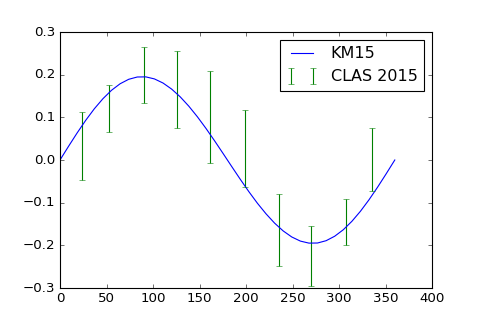

In [8]:
fig, ax = plt.subplots(1,1, figsize=[6,4])
ax.plot(phis, BSA, label='KM15')
ax.errorbar(pve[:,0], pve[:,1], pve[:,2], linestyle='None', label='CLAS 2015')
ax.legend(loc='upper right')
fig.savefig('fig1')